<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/module2/JPMC_Ramu_Ranjani_John_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
# John Mohsbeck
# Lab Mar. 20
# Data preparation
# EDA
# Feature Importance
# Logistic Regression model
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [103]:
df = pd.read_csv("Churn_Modelling.csv")
print(len(df))
df.head()

10000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Prep

Dataset

records: 10000

columns: 14

In [104]:
df.shape

(10000, 14)

In [105]:
df.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


In [106]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Remove the following columns.
They do not add value to modeling the exited target.

"Rownumber",
"CustomerId",
"Surname"

In [107]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [108]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [109]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [110]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Replace blanks with underscore "_" and transform column names to lower case.

In [111]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [112]:
df.nunique()

creditscore         460
geography             3
gender                2
age                  70
tenure               11
balance            6382
numofproducts         4
hascrcard             2
isactivemember        2
estimatedsalary    9999
exited                2
dtype: int64

In [113]:
df['exited'].unique()

array([1, 0])

In [114]:
df.dtypes

creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [115]:
df['exited'].nunique()

2

In [116]:
df['exited'].sample(25)

7191    0
7282    1
86      1
8029    0
7506    1
4393    0
7731    1
2831    0
4277    0
6805    0
2931    0
379     1
9749    0
2639    1
913     0
6363    0
961     0
6126    0
4530    0
8874    0
5194    0
2868    1
7367    0
7547    0
5079    0
Name: exited, dtype: int64

In [117]:
df.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

Checking for duplicates.
Found 0 duplicates.

In [118]:
duplicates = df.duplicated()
print(duplicates.sum())

0


##Dataset is Imbalanced

Exited: 1622
Stay: 6378

Split dataset 80/20 to df_train_full, df_test.
Then split df_train_full 67%, 33% to df_train, df_val.

In [245]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.exited.values
y_val = df_val.exited.values
del df_train['exited']
del df_val['exited']


# EDA

In [120]:
df_train_full.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [121]:
df_train_full.exited.value_counts()

0    6378
1    1622
Name: exited, dtype: int64

In [122]:
1622 / (6378 + 1622)

0.20275

Global Mean

In [123]:
global_mean = df_train_full.exited.mean()
round(global_mean,5)

0.20275

In [124]:
df.dtypes

creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

List categorial features and numeric features.

In [125]:
categorical = ['geography', 'gender', 'tenure', 'numofproducts', 'hascrcard', 'isactivemember']
numerical = ['creditscore', 'age', 'balance', 'estimatedsalary']

In [126]:
df_train_full[categorical].nunique()

geography          3
gender             2
tenure            11
numofproducts      4
hascrcard          2
isactivemember     2
dtype: int64

In [127]:
df_train_full[numerical].describe()

,creditscore,age,balance,estimatedsalary
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,650.313625,38.887250,76463.443272,100143.429649
std,96.676990,10.468894,62372.543408,57574.884151
min,350.000000,18.000000,0.000000,91.750000
25%,583.000000,32.000000,0.000000,51014.837500
50%,651.000000,37.000000,97055.145000,99836.215000
75%,718.000000,44.000000,127639.372500,149373.527500
max,850.000000,92.000000,250898.090000,199970.740000


In [128]:
df_train_full.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.007697,-0.001942,-0.001585,0.015114,-0.001258,0.031762,0.000399,-0.026420
age,-0.007697,1.000000,-0.012859,0.028930,-0.029657,-0.014857,0.088084,-0.010799,0.278079
tenure,-0.001942,-0.012859,1.000000,-0.007597,0.015562,0.024802,-0.030183,0.000881,-0.008248
balance,-0.001585,0.028930,-0.007597,1.000000,-0.313202,-0.013750,-0.011692,0.009864,0.116926
numofproducts,0.015114,-0.029657,0.015562,-0.313202,1.000000,0.005514,0.006243,0.018054,-0.040868
hascrcard,-0.001258,-0.014857,0.024802,-0.013750,0.005514,1.000000,-0.006068,-0.006200,-0.014177
isactivemember,0.031762,0.088084,-0.030183,-0.011692,0.006243,-0.006068,1.000000,-0.006182,-0.159633
estimatedsalary,0.000399,-0.010799,0.000881,0.009864,0.018054,-0.006200,-0.006182,1.000000,0.006483
exited,-0.026420,0.278079,-0.008248,0.116926,-0.040868,-0.014177,-0.159633,0.006483,1.000000


Age is positively correleated to exited.

Balance is positively correlated to exited.

numofproducts, hascrcard and isactivemember are negatively correlated to exited

# Feature Importance

In [129]:
female_mean = df_train_full[df_train_full.gender == 'female'].exited.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].exited.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.249
gender == male:   0.164


Female risk ratio: 1.229;  high > 1.0 => risky

In [130]:
female_mean / global_mean


1.2296637092961358

Male risk ratio: 0.807;  > 0.50 but < 1.0 => less risky than females

In [131]:
male_mean / global_mean

0.8076816986463685

In [132]:
df_group = df_train_full.groupby(by='gender').exited.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.249314,0.046564,1.229664
male,0.163757,-0.038993,0.807682


isactivemeber risk ratio

In [133]:
isactivemember_no = df_train_full[df_train_full.isactivemember == 0].exited.mean()
print('isactivemember No:', round(isactivemember_no, 3))

isactivemember_yes = df_train_full[df_train_full.isactivemember == 1].exited.mean()
print('isactivemember Yes:', round(isactivemember_yes, 3))

isactivemember No: 0.268
isactivemember Yes: 0.14


isactivemember No: has risk ratio > 1.0 => risky

In [134]:
isactivemember_no / global_mean

1.3239149009209348

In [135]:
isactivemember_yes / global_mean

0.690650187488022

hascrcard risk ratio

In [136]:
hascrcard_no = df_train_full[df_train_full.hascrcard == 0].exited.mean()
print('hascrcard No:', round(hascrcard_no, 3))

hascrcard_yes = df_train_full[df_train_full.hascrcard == 1].exited.mean()
print('hascrcard yes:', round(hascrcard_yes, 3))

hascrcard No: 0.212
hascrcard yes: 0.199


In [137]:
hascrcard_no / global_mean

1.0436700151079652

Hascrcard No: risk ratio > 1.0 => risky

In [138]:
hascrcard_yes / global_mean


0.9819019597925971

Numofproducts risk ratio

In [139]:
numofproducts_one = df_train_full[df_train_full.numofproducts == 1].exited.mean()
print('number of products 1:', round(numofproducts_one, 3))

numofproducts_two = df_train_full[df_train_full.numofproducts == 2].exited.mean()
print('number of products 2:', round(numofproducts_two, 3))

numofproducts_three = df_train_full[df_train_full.numofproducts == 3].exited.mean()
print('number of products 3:', round(numofproducts_three, 3))

numofproducts_four = df_train_full[df_train_full.numofproducts == 4].exited.mean()
print('number of products 4:', round(numofproducts_four, 3))

number of products 1: 0.274
number of products 2: 0.077
number of products 3: 0.817
number of products 4: 1.0


number of products of 1, 3 & 4; risk ratio > 1.0 => risky

In [140]:
numofproducts_one / global_mean

1.3514325731676886

In [141]:
numofproducts_two / global_mean

0.37764122068156847

In [142]:
numofproducts_three / global_mean

4.031327241299708

In [143]:
numofproducts_four / global_mean

4.932182490752157

In [144]:
from IPython.display import display
global_mean = df_train_full.exited.mean()
global_mean

0.20275

Compute Risk ratio and Risk differnces across categorical feature vs exited

In [145]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).exited.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
geography,,,
france,0.160991,-0.041759,0.794039
germany,0.318227,0.115477,1.569552
spain,0.168522,-0.034228,0.831183


,mean,diff,risk
gender,,,
female,0.249314,0.046564,1.229664
male,0.163757,-0.038993,0.807682


,mean,diff,risk
tenure,,,
0,0.239521,0.036771,1.181361
1,0.213483,0.010733,1.052938
2,0.181168,-0.021582,0.893554
3,0.223881,0.021131,1.104220
4,0.202500,-0.000250,0.998767
5,0.197789,-0.004961,0.975530
6,0.201777,-0.000973,0.995199
7,0.174070,-0.028680,0.858543
8,0.193267,-0.009483,0.953227


,mean,diff,risk
numofproducts,,,
1,0.274003,0.071253,1.351433
2,0.076567,-0.126183,0.377641
3,0.817352,0.614602,4.031327
4,1.000000,0.797250,4.932182


,mean,diff,risk
hascrcard,,,
0,0.211604,0.008854,1.043670
1,0.199081,-0.003669,0.981902


,mean,diff,risk
isactivemember,,,
0,0.268424,0.065674,1.323915
1,0.140029,-0.062721,0.690650


Compute Mutual Information Scores

In [146]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.exited)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
numofproducts,0.069025
geography,0.013117
isactivemember,0.012872
gender,0.005598
tenure,0.000904


,MI
geography,0.013117
isactivemember,0.012872
gender,0.005598
tenure,0.000904
hascrcard,0.000100


# One Hot Encoding

In [147]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[categorical + numerical].to_dict(orient='records')


In [148]:
train_dict[0]

{'geography': 'spain',
 'gender': 'male',
 'tenure': 9,
 'numofproducts': 2,
 'hascrcard': 1,
 'isactivemember': 0,
 'creditscore': 648,
 'age': 46,
 'balance': 127209.0,
 'estimatedsalary': 77405.95}

In [149]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [150]:
X_train = dv.transform(train_dict)
X_train.shape

(5360, 13)

In [151]:
type(X_train)

numpy.ndarray

In [152]:
dv.feature_names_

['age',
 'balance',
 'creditscore',
 'estimatedsalary',
 'gender=female',
 'gender=male',
 'geography=france',
 'geography=germany',
 'geography=spain',
 'hascrcard',
 'isactivemember',
 'numofproducts',
 'tenure']

# Train our Logistic Regression Model

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [154]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [155]:
y_pred = model.predict_proba(X_val)

In [156]:
y_pred

array([[0.91375307, 0.08624693],
       [0.91552887, 0.08447113],
       [0.74565999, 0.25434001],
       ...,
       [0.71493091, 0.28506909],
       [0.70010821, 0.29989179],
       [0.82596461, 0.17403539]])

In [157]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.08624693, 0.08447113, 0.25434001, ..., 0.28506909, 0.29989179,
       0.17403539])

Show Max & Min of y_pred

In [158]:
max(y_pred)

0.7592834881929926

In [159]:
min(y_pred)

0.03685726521795917

In [160]:
exited = y_pred > 0.5

In [161]:
(y_val == exited).mean()

0.7901515151515152

Show Y intercept

In [162]:
model.intercept_[0]

-0.0005703091676461757

Show Coefficients

In [163]:
dict(zip(dv.feature_names_, model.coef_[0].round(7)))

{'age': 0.0413732,
 'balance': 3.3e-06,
 'creditscore': -0.0048121,
 'estimatedsalary': -1.5e-06,
 'gender=female': 0.0015991,
 'gender=male': -0.0021694,
 'geography=france': -0.0016313,
 'geography=germany': 0.0016032,
 'geography=spain': -0.0005422,
 'hascrcard': -0.0007043,
 'isactivemember': -0.0031144,
 'numofproducts': -0.0010604,
 'tenure': -0.0056406}

# Let's use the model on a few single records from the dataset to check their predict probablity




In [164]:
customer = {
    'creditscore' : 549,
    'geography' : 'spain',
    'gender' : 'female',
    'age' :   24,
    'tenure' : 9,
    'balance' : 0,
    'numofproducts' : 2,
    'hascrcard' : 1,
    'isactivemember' : 1,
    'estimatedsalary' : 14406.41
}

In [165]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.15102699837385597

In [166]:
print(list(X_test[0]))

[24.0, 0.0, 549.0, 14406.41, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 9.0]


In [167]:
customer = {
   'creditscore' : 475,
    'geography' : 'france',
    'gender' : 'female',
    'age' :   45,
    'tenure' : 0,
    'balance' : 134264.04,
    'numofproducts' : 1,
    'hascrcard' : 1,
    'isactivemember' : 0,
    'estimatedsalary' : 27822.99 

}

In [168]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.49249714958118584

In [169]:
print(list(X_test[0]))

[45.0, 134264.04, 475.0, 27822.99, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]


In [170]:
customer = {
   'creditscore' : 576,
    'geography' : 'germany',
    'gender' : 'female',
    'age' :   71,
    'tenure' : 6,
    'balance' : 140273.47,
    'numofproducts' : 1,
    'hascrcard' : 1,
    'isactivemember' : 1,
    'estimatedsalary' :  193135.25

}

In [171]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.5741919442980223

In [172]:
print(list(X_test[0]))


[71.0, 140273.47, 576.0, 193135.25, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 6.0]


##############################################################################

Part 2
1. Use Feature Selector Class.
2. Call Logistic Regression model on resulting dataset from Feature Selector Class.
3. Compare Result.

0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation greater than 0.99.

0 features with a correlation greater than 0.50.



<ipython-input-283-423dca8ca313>:179: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
<ipython-input-283-423dca8ca313>:179: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


Training Gradient Boosting Model



/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecat


2926 features with zero importance.



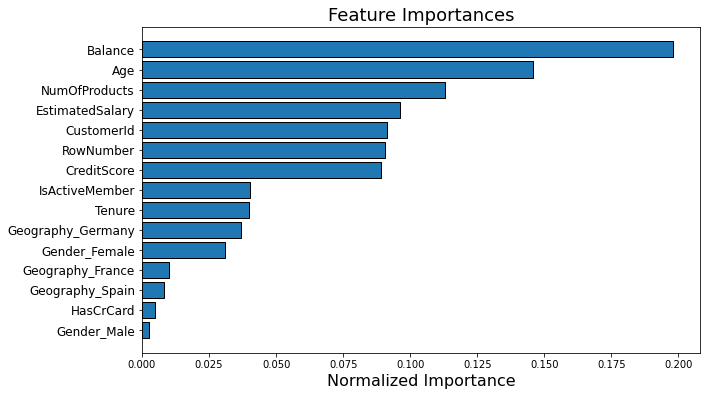

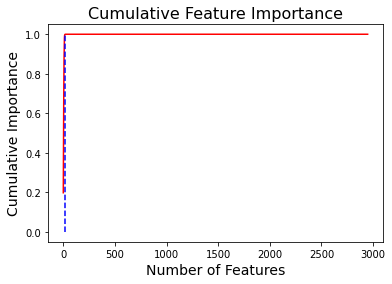

13 features required for 0.99 of cumulative importance
0 features with greater than 0.80 missing values.

0 features with a single unique value.

0 features with a correlation greater than 0.95.



<ipython-input-283-423dca8ca313>:179: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


Training Gradient Boosting Model



/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecat


2930 features with zero importance.

2937 features that do not contribute to cumulative importance of 0.95.

2937 total features out of 2947 identified for removal.

2937 features identified for removal
['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run
Removed 2937 features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_Germany  10000 non-nul

In [283]:
"""# Feature Selection

In this notebook we will develop a Python class for feature detection. The objective is to create a an object that encompasses several different feature selection methods and that can be applied to multiple datasets. This class will implement five different feature selection methods:

1. Remove columns with a missing fraction greater than a specified threshold
2. Remove features with only a single unique value
3. Remove collinear features as idenfitied by a correlation coefficient greater than a specified value
4. Remove features with 0.0 importance from a gradient boosting machine
5. Remove features that do not contribute to a specified cumulative feature importance from the gradient boosting machine
"""

import pandas as pd
import numpy as np

import lightgbm as lgb

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain

train = pd.read_csv("Churn_Modelling.csv")
train_labels = train['Exited']
y_train_full = train['Exited']
train = train.drop(columns = 'Exited')
y_val2 = y_train_full.values

train.head()

import pandas as pd
import numpy as np

import lightgbm as lgb

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain

class FeatureSelector():
    """
    Class for performing feature selection for machine learning or data preprocessing.
    
    Implements five different methods
    
        1. Remove columns with a missing percentage greater than a specified threshold
        2. Remove columns with a single unique value
        3. Remove collinear variables with a correlation greater than a specified correlation coefficient
        4. Remove features with 0.0 feature importance from a gradient boosting machine (gbm)
        5. Remove features that do not contribute to a specified cumulative feature importance from the gbm
        
    Attributes
    --------
    
    record_missing : dataframe
        Records the fraction of missing values for features with missing fraction above threshold
    
    record_single_unique : dataframe
        Records the features that have a single unique value
    
    record_collinear : dataframe
        Records the pairs of collinear variables with a correlation coefficient above the threshold
    
    record_zero_importance : dataframe
        Records the zero importance features in the data according to the gbm
    
    record_low_importance : dataframe
        Records the lowest importance features not needed to reach the threshold of cumulative importance according to the gbm
    
    feature_importances : dataframe
        All the features importances from the gbm
    
    removal_ops : dict
        Dictionary of removal operations and associated features for removal identified
        
    Notes
    --------
    
        - All 5 operations can be run with the `identify_all` method.
        - Calculating the feature importances requires labels (a supervised learning task) 
          for training the gradient boosting machine
        - For the feature importances, the dataframe is first one-hot encoded before training the gbm.
    
    """
    
    def __init__(self):
        
        # Dataframes recording information about features to remove
        self.record_missing = None
        self.record_single_unique = None
        self.record_collinear = None
        self.record_zero_importance = None
        self.record_low_importance = None
        
        self.feature_importances = None
        
        # Dictionary to hold removal operations
        self.removal_ops = {}
        
        
        
    def identify_missing(self, data, missing_threshold):
        """Find the features with a fraction of missing values above `missing_threshold`"""
        
        self.missing_threshold = missing_threshold

        # Calculate the fraction of missing in each column 
        missing_series = data.isnull().sum() / data.shape[0]
        
        self.missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        # Find the columns with a missing percentage above the threshold
        record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        to_drop = list(record_missing['feature'])

        self.record_missing = record_missing
        self.removal_ops['missing'] = to_drop
        
        print('%d features with greater than %0.2f missing values.\n' % (len(self.removal_ops['missing']), self.missing_threshold))
        
    def identify_single_unique(self, data):
        """Identifies features with only a single unique value. NaNs do not count as a unique value. """

        # Calculate the unique counts in each column
        unique_counts = data.nunique()

        self.unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
        
        # Find the columns with only one unique count
        record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})

        to_drop = list(record_single_unique['feature'])
    
        self.record_single_unique = record_single_unique
        self.removal_ops['single_unique'] = to_drop
        
        print('%d features with a single unique value.\n' % len(self.removal_ops['single_unique']))
    
    def identify_collinear(self, data, correlation_threshold):
        """
        Finds collinear features based on the correlation coefficient between features. 
        For each pair of features with a correlation coefficient greather than `correlation_threshold`,
        only one of the pair is identified for removal. 

        Using code adapted from: https://gist.github.com/Swarchal/e29a3a1113403710b6850590641f046c
        
        Parameters
        --------

        data : dataframe
            Data observations in the rows and features in the columns

        correlation_threshold : float between 0 and 1
            Value of the Pearson correlation cofficient for identifying correlation features

        """
        
        self.correlation_threshold = correlation_threshold

        # Calculate the correlations between every column
        corr_matrix = data.corr()
        
        self.corr_matrix = corr_matrix
    
        # Extract the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
        
        # Select the features with correlations above the threshold
        # Need to use the absolute value
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

        # Dataframe to hold correlated pairs
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

        # Iterate through the columns to drop
        for column in to_drop:

            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]    

            # Record the information (need a temp df for now)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            record_collinear = record_collinear.append(temp_df, ignore_index = True)

            
        self.record_collinear = record_collinear
        self.removal_ops['collinear'] = to_drop
        
        print('%d features with a correlation greater than %0.2f.\n' % (len(self.removal_ops['collinear']), self.correlation_threshold))

    def identify_zero_importance(self, features, labels, eval_metric, task='classification', 
                                 n_iterations=10, early_stopping = True):
        """
        
        Identify the features with zero importance according to a gradient boosting machine.
        The gbm can be trained with early stopping using a validation set to prevent overfitting. 
        The feature importances are averaged over n_iterations to reduce variance. 
        
        Uses the LightGBM implementation (http://lightgbm.readthedocs.io/en/latest/index.html)

        Parameters 
        --------
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')

        eval_metric : string
            Evaluation metric to use for the gradient boosting machine

        task : string, default = 'classification'
            The machine learning task, either 'classification' or 'regression'

        n_iterations : int, default = 10
            Number of iterations to train the gradient boosting machine
            
        early_stopping : boolean, default = True
            Whether or not to use early stopping with a validation set when training
        
        
        Notes
        --------
        
        - Features are one-hot encoded to handle the categorical variables before training.
        - The gbm is not optimized for any particular task and might need some hyperparameter tuning
        - Feature importances, including zero importance features, can change across runs

        """

        # One hot encoding
        features = pd.get_dummies(features)

        # Extract feature names
        feature_names = list(features.columns)

        # Convert to np array
        features = np.array(features)
        labels = np.array(labels).reshape((-1, ))

        # Empty array for feature importances
        feature_importance_values = np.zeros(len(feature_names))
        
        print('Training Gradient Boosting Model\n')
        
        # Iterate through each fold
        for _ in range(n_iterations):

            if task == 'classification':
                model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)

            elif task == 'regression':
                model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)

            else:
                raise ValueError('Task must be either "classification" or "regression"')
                
            # If training using early stopping need a validation set
            if early_stopping:
                
                train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15)

                # Train the model with early stopping
                model.fit(train_features, train_labels, eval_metric = eval_metric,
                          eval_set = [(valid_features, valid_labels)],
                          early_stopping_rounds = 100, verbose = -1)
                
                # Clean up memory
                gc.enable()
                del train_features, train_labels, valid_features, valid_labels
                gc.collect()
                
            else:
                model.fit(features, labels)

            # Record the feature importances
            feature_importance_values += model.feature_importances_ / n_iterations

        feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

        # Sort features according to importance
        feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

        # Normalize the feature importances to add up to one
        feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
        feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

        # Extract the features with zero importance
        record_zero_importance = feature_importances[feature_importances['importance'] == 0.0]
        
        to_drop = list(record_zero_importance['feature'])

        self.feature_importances = feature_importances
        self.record_zero_importance = record_zero_importance
        self.removal_ops['zero_importance'] = to_drop
        
        print('\n%d features with zero importance.\n' % len(self.removal_ops['zero_importance']))
    
    def identify_low_importance(self, cumulative_importance):
        """
        Finds the lowest importance features not needed to account for `cumulative_importance` 
        of the feature importance from the gradient boosting machine. As an example, if cumulative
        importance is set to 0.95, this will retain only the most important features needed to 
        reach 95% of the total feature importance. The identified features are those not needed.

        Parameters
        --------
        cumulative_importance : float between 0 and 1
            The fraction of cumulative importance to account for 

        """

        self.cumulative_importance = cumulative_importance
        
        # The feature importances need to be calculated before running
        if self.feature_importances is None:
            raise NotFittedError('Feature importances have not yet been determined. Call the `identify_zero_importance` method` first.')
            
        # Make sure most important features are on top
        self.feature_importances = self.feature_importances.sort_values('cumulative_importance')

        # Identify the features not needed to reach the cumulative_importance
        record_low_importance = self.feature_importances[self.feature_importances['cumulative_importance'] > cumulative_importance]

        to_drop = list(record_low_importance['feature'])

        self.record_low_importance = record_low_importance
        self.removal_ops['low_importance'] = to_drop
    
        print('%d features that do not contribute to cumulative importance of %0.2f.\n' % (len(self.removal_ops['low_importance']), self.cumulative_importance))
        
    def identify_all(self, features, labels, selection_params):
        """
        Use all five of the methods to identify features to remove.
        
        Parameters
        --------
        
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')
            
        selection_params : dict
           Parameters to use in the five feature selection methhods.
           Params must contain the keys ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']
        
        """
        
        # Check for all required parameters
        for param in ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']:
            if param not in selection_params.keys():
                raise ValueError('%s is a required parameter for this method' % param)
        
        # Implement each of the five methods
        self.identify_missing(features, selection_params['missing_threshold'])
        self.identify_single_unique(features)
        self.identify_collinear(features, selection_params['correlation_threshold'])
        self.identify_zero_importance(features, labels, selection_params['eval_metric'], selection_params['task'])
        self.identify_low_importance(selection_params['cumulative_importance'])
        
        # Find the number of features identified to drop
        self.n_identified = len(set(list(chain(*list(self.removal_ops.values())))))
        print('%d total features out of %d identified for removal.\n' % (self.n_identified, pd.get_dummies(features).shape[1]))
        
    def check_identified(self):
        """Check the identified features before removal. Returns a set of the unique features identified."""
        
        all_identified = set(list(chain(*list(self.removal_ops.values()))))
        print('%d features identified for removal' % len(all_identified))
        
        return all_identified
        
    
    def remove(self, data, methods):
        """
        Remove the features from the data according to the specified methods.
        
        Parameters
        --------
            data : dataframe
                Dataframe with features to remove
            methods : 'all' or list of methods
                If methods == 'all', any methods that have identified features will be used
                Otherwise, only the specified methods will be used.
                Can be one of ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
                
        Return
        --------
            data : dataframe
                Dataframe with identified features removed
                
        
        Notes 
        --------
            - This first one-hot encodes the categorical variables in accordance with the gradient boosting machine.
            - Check the features that will be removed before transforming data!
        
        """
        
        
        features_to_drop = []
        
        data = pd.get_dummies(data)
        
        if methods == 'all':
            
            print('{} methods have been run'.format(list(self.removal_ops.keys())))
            
            # Find the unique features to drop
            features_to_drop = set(list(chain(*list(self.removal_ops.values()))))
            
        else:
            # Iterate through the specified methods
            for method in methods:
                # Check to make sure the method has been run
                if method not in self.removal_ops.keys():
                    raise NotFittedError('%s method has not been run' % method)
                    
                # Append the features identified for removal
                else:
                    features_to_drop.append(self.removal_ops[method])
        
            # Find the unique features to drop
            features_to_drop = set(list(chain(*features_to_drop)))
            
        # Remove the features and return the data
        data = data.drop(columns = features_to_drop)
        self.removed_features = features_to_drop
        
        print('Removed %d features' % len(features_to_drop))
        return data
    
    def plot_missing2(self):
        """Histogram of missing fraction in each feature"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
        
        self.reset_plot()
        self.missing_stats.plot.hist(color = 'red', edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Missing Fraction', size = 18); plt.title('Missing Fraction Histogram', size = 18);

    def plot_missing(self, threshold=0.0):
        """Histogram of missing fraction in each feature and print columns with missing values above threshold"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
    
        # Extract the column names with missing fraction above threshold
        cols_above_threshold = self.missing_stats[self.missing_stats['missing_fraction'] > threshold].index.tolist()
        print(f"Columns with missing fraction above {threshold:.2f}: {cols_above_threshold}")
    
        # Plot the missing fraction histogram
        self.reset_plot()
        self.missing_stats.plot.bar(y='missing_fraction', color='red', edgecolor='k', figsize=(len(self.missing_stats), 4), fontsize=14)
        plt.xticks(rotation=90)
        plt.ylabel('Missing Fraction', size=18)
        plt.xlabel('Feature', size=18)
        plt.title('Missing Fraction Histogram', size=18);

    
    def plot_unique(self):
        """Histogram of number of unique values in each feature"""
        if self.record_single_unique is None:
            raise NotImplementedError('Unique values have not been calculated. Run `identify_single_unique`')
        
        self.reset_plot()
        self.unique_stats.plot.hist(edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Unique Values', size = 18); plt.title('Unique Values Histogram', size = 18);
        
    
    def plot_collinear(self):
        """
        Heatmap of the features with correlations above the correlated threshold in the data.
        
        Notes
        --------
            - Not all of the plotted correlations are above the threshold because this plots
            all the variables that have been idenfitied as having even one correlation above the threshold
            - The features on the x-axis are those that will be removed. The features on the y-axis
            are the correlated feature with those on the x-axis
        
        """
        
        if self.record_collinear is None:
            raise NotImplementedError('Collinear features have not been idenfitied. Run `identify_collinear`.')
        
        # Identify the correlations that were above the threshold
        corr_matrix_plot = self.corr_matrix.loc[list(set(self.record_collinear['corr_feature'])), 
                                                list(set(self.record_collinear['drop_feature']))]

        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(10, 8))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
                    linewidths=.25, cbar_kws={"shrink": 0.6})

        ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
        ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));

        ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
        ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
        
        plt.xlabel('Features to Remove', size = 8); plt.ylabel('Correlated Feature', size = 8)
        plt.title("Correlations Above Threshold", size = 14)
        
    def plot_feature_importances(self, threshold = None):
        """
        Plots 15 most important features and the cumulative importance of features.
        If `threshold` is provided, prints the number of features needed to reach `threshold` cumulative importance.

        Parameters
        --------
        threshold : float, between 0 and 1 default = None
            Threshold for printing information about cumulative importances

        """
        
        if self.record_zero_importance is None:
            raise NotImplementedError('Feature importances have not been determined. Run `idenfity_zero_importance`')

        self.reset_plot()
        
        # Make a horizontal bar chart of feature importances
        plt.figure(figsize = (10, 6))
        ax = plt.subplot()

        # Need to reverse the index to plot most important on top
        ax.barh(list(reversed(list(self.feature_importances.index[:15]))), 
                self.feature_importances['normalized_importance'].head(15), 
                align = 'center', edgecolor = 'k')

        # Set the yticks and labels
        ax.set_yticks(list(reversed(list(self.feature_importances.index[:15]))))
        ax.set_yticklabels(self.feature_importances['feature'].head(15), size = 12)

        # Plot labeling
        plt.xlabel('Normalized Importance', size = 16); plt.title('Feature Importances', size = 18)
        plt.show()

        # Cumulative importance plot
        plt.figure(figsize = (6, 4))
        plt.plot(list(range(1, len(self.feature_importances) + 1)), self.feature_importances['cumulative_importance'], 'r-')
        plt.xlabel('Number of Features', size = 14); plt.ylabel('Cumulative Importance', size = 14); 
        plt.title('Cumulative Feature Importance', size = 16);

        if threshold:

            # Index of minimum number of features needed for cumulative importance threshold
            importance_index = np.min(np.where(self.feature_importances['cumulative_importance'] > threshold))
            plt.vlines(x = importance_index + 1, ymin = 0, ymax = 1, linestyles='--', colors = 'blue')
            plt.show()

            print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

        
    def reset_plot(self):
        plt.rcParams = plt.rcParamsDefault

fs = FeatureSelector()

fs.identify_missing(train,0.6)
# fs.plot_missing()

fs.identify_single_unique(train)

fs.identify_collinear(train, 0.99)
#fs.plot_collinear()

fs.identify_collinear(train, 0.50)
#fs.plot_collinear()

fs.identify_zero_importance(train, train_labels, eval_metric='auc')

fs.plot_feature_importances(threshold = 0.99)

fs.identify_all(train, train_labels, {'missing_threshold': 0.8, 'correlation_threshold': 0.95, 'eval_metric': 'auc','task': 'classification', 'cumulative_importance': 0.95})

features_identified = fs.check_identified()

list(features_identified)[:10]

train_removed = fs.remove(train, methods = 'all')

train_removed.info()

train_removed.to_csv('applicationData_after_FS.csv')



In [284]:
train_removed.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_Germany
0,1,15634602,619,42,2,0.00,1,1,101348.88,0
1,2,15647311,608,41,1,83807.86,1,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,0,113931.57,0
3,4,15701354,699,39,1,0.00,2,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,79084.10,0


In [285]:
train_removed.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
       'Geography_Germany'],
      dtype='object')

In [286]:
train_removed.shape

(10000, 10)

In [287]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [288]:
len(y_train)

5360

In [290]:
y_train_full.head

<bound method NDFrame.head of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

1. Call Logistic Regression using outout from Feature Selector: train_removed
2. Call predict_proba.
3. Look at Results.

In [291]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear', random_state=1)
model2.fit(train_removed, y_train_full)

LogisticRegression(random_state=1, solver='liblinear')

In [292]:
y_pred2 = model2.predict_proba(train_removed)

In [293]:
y_pred2

array([[0.84971761, 0.15028239],
       [0.7896234 , 0.2103766 ],
       [0.72138249, 0.27861751],
       ...,
       [0.85786095, 0.14213905],
       [0.80559471, 0.19440529],
       [0.7638604 , 0.2361396 ]])

In [294]:
y_pred2 = model2.predict_proba(train_removed)[:,1]

In [295]:
y_pred2

array([0.15028239, 0.2103766 , 0.27861751, ..., 0.14213905, 0.19440529,
       0.2361396 ])

In [296]:
max(y_pred2)

0.36601290148101534

In [297]:
min(y_pred2)

0.13705055327052243

In [298]:
exited = y_pred2 > 0.5

In [299]:
exited

array([False, False, False, ..., False, False, False])

In [302]:
(y_val2 == exited).mean()


0.7963

In [303]:
model.intercept_[0]

7.408331775099245e-13

In [304]:
model.coef_[0].round(7)

array([-4.4e-06, -1.0e-07, -3.0e-07,  3.0e-07, -0.0e+00,  4.8e-06,
       -0.0e+00, -0.0e+00,  5.0e-07,  0.0e+00])

Conclusion:
1. Using EDA and Feature Importance gave a better result than just taking dataset and applying the Feature Selector class and then calling the Logistic Regression model.

2. The Feature Selector class kept CustomerId and Rownumber, but kept Surname.

3. The Y-Intercept and Coefficients are very small.